In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2

Dataset link: - https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset/*data*

In [4]:
data_set_path = '/content/drive/MyDrive/top mentor deep learning/01.10.2023'

In [5]:
train_data_path = '/content/drive/MyDrive/top mentor deep learning/01.10.2023/train'

In [6]:
test_data_path = '/content/drive/MyDrive/top mentor deep learning/01.10.2023/test'

In [7]:
img_height,img_width = [256,256]

In [8]:
from glob import glob
glob('/content/drive/MyDrive/top mentor deep learning/01.10.2023/train/*')

['/content/drive/MyDrive/top mentor deep learning/01.10.2023/train/NORMAL',
 '/content/drive/MyDrive/top mentor deep learning/01.10.2023/train/COVID19',
 '/content/drive/MyDrive/top mentor deep learning/01.10.2023/train/PNEUMONIA']

In [9]:
glob('/content/drive/MyDrive/top mentor deep learning/01.10.2023/test/*')

['/content/drive/MyDrive/top mentor deep learning/01.10.2023/test/COVID19',
 '/content/drive/MyDrive/top mentor deep learning/01.10.2023/test/NORMAL',
 '/content/drive/MyDrive/top mentor deep learning/01.10.2023/test/PNEUMONIA']

In [10]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_data_preprocessing = ImageDataGenerator(rescale = 1.0/255.0,
                                              horizontal_flip = True,
                                              shear_range = 0.2,
                                              zoom_range = 0.2)

In [12]:
test_data_preprocessing = ImageDataGenerator(rescale = 1.0/255.0)

In [13]:
labels = ['COVID19','NORMAL','PNEUMONIA']

In [14]:
train_data = train_data_preprocessing.flow_from_directory(train_data_path,target_size = (img_height,img_width),classes=labels, class_mode='categorical',batch_size = 32)

Found 5169 images belonging to 3 classes.


In [15]:
test_data = test_data_preprocessing.flow_from_directory(test_data_path,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=32)

Found 1288 images belonging to 3 classes.


All types of X-ray image samples

(1482, 1982, 3)


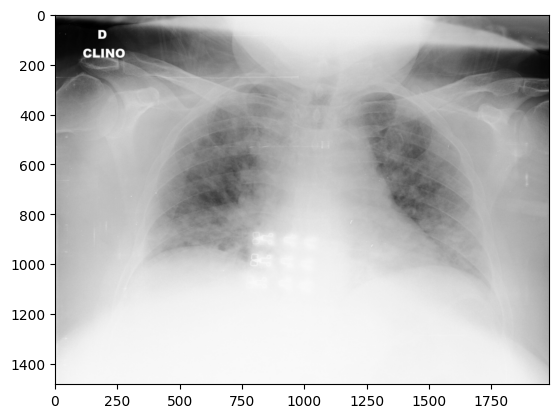

In [16]:
#COVID-19  x-ray image
covid = plt.imread('/content/drive/MyDrive/top mentor deep learning/01.10.2023/train/COVID19/COVID19(1).jpg')
plt.imshow(covid)
print(covid.shape)

(1509, 2105, 3)


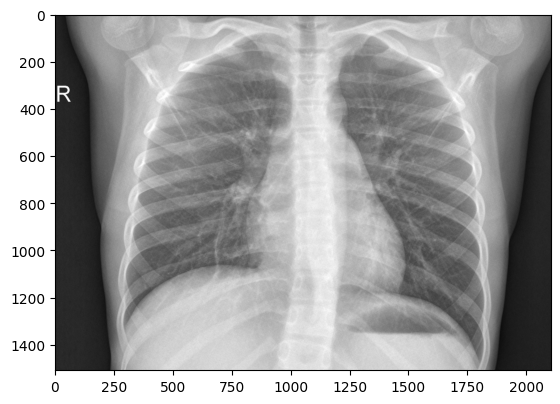

In [17]:
#NORMAL x-ray image
normal = plt.imread('/content/drive/MyDrive/top mentor deep learning/01.10.2023/train/NORMAL/NORMAL(1).jpg')
plt.imshow(normal)
print(normal.shape)

(760, 1152, 3)


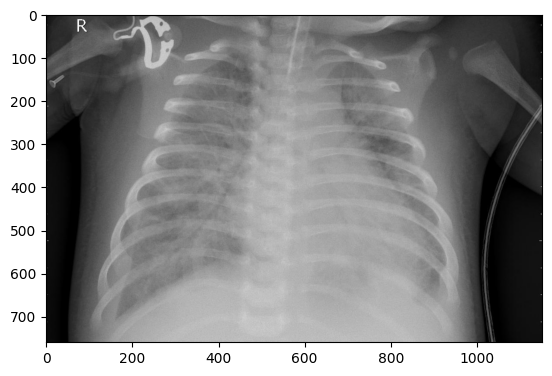

In [18]:
#PNEUMONIA x-ray image
pnemonia = plt.imread('/content/drive/MyDrive/top mentor deep learning/01.10.2023/train/PNEUMONIA/PNEUMONIA(0).jpg')
plt.imshow(pnemonia)
print(pnemonia.shape)

Developing Architecture

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, sigmoid , softmax

In [20]:
model = Sequential()

#Filter and Maxpool layer-1
model.add(Conv2D(128,kernel_size=(3,3),padding='same',input_shape=(img_height,img_width,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Filter and Maxpool layer-2
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Filter and Maxpool layer-3
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Filter and Maxpool layer-4
model.add(Conv2D(10,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Flatten Layer
model.add(Flatten())

model.add(Dense(32,activation='relu'))#Hidden layer-1
model.add(Dense(8,activation ='relu'))#Hidden layer-1

#Output Layer
model.add(Dense(3,activation='softmax'))


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 32)        0

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['Accuracy'])

In [23]:
model.fit(train_data,epochs = 20)

Epoch 1/20
162/162 [==============================] - 1394s 9s/step - loss: 0.6252 - Accuracy: 0.7369
Epoch 2/20
162/162 [==============================] - 142s 877ms/step - loss: 0.3489 - Accuracy: 0.8698
Epoch 3/20
162/162 [==============================] - 141s 871ms/step - loss: 0.2877 - Accuracy: 0.8936
Epoch 4/20
162/162 [==============================] - 139s 855ms/step - loss: 0.2650 - Accuracy: 0.9011
Epoch 5/20
162/162 [==============================] - 140s 861ms/step - loss: 0.2567 - Accuracy: 0.9108
Epoch 6/20
162/162 [==============================] - 142s 875ms/step - loss: 0.2270 - Accuracy: 0.9211
Epoch 7/20
162/162 [==============================] - 137s 848ms/step - loss: 0.2318 - Accuracy: 0.9164
Epoch 8/20
162/162 [==============================] - 136s 842ms/step - loss: 0.2128 - Accuracy: 0.9259
Epoch 9/20
162/162 [==============================] - 137s 847ms/step - loss: 0.2102 - Accuracy: 0.9244
Epoch 10/20
162/162 [==============================] - 136s 841ms/

In [24]:
training_acc = model.history.history['Accuracy']

training_acc

[0.7368929982185364,
 0.8698007464408875,
 0.8935964107513428,
 0.9011414051055908,
 0.9108144640922546,
 0.9210678935050964,
 0.9164248108863831,
 0.9259044528007507,
 0.9243567585945129,
 0.9276455640792847,
 0.9357709288597107,
 0.9361578822135925,
 0.9375120997428894,
 0.9303540587425232,
 0.9369317293167114,
 0.9396401643753052,
 0.9440897703170776,
 0.9437028169631958,
 0.9460243582725525,
 0.9456374645233154]

In [25]:
training_loss = model.history.history['loss']

training_loss

[0.6251766681671143,
 0.348903089761734,
 0.2877388298511505,
 0.26498502492904663,
 0.2567192316055298,
 0.2269604206085205,
 0.23182013630867004,
 0.2127523571252823,
 0.2101910561323166,
 0.20423048734664917,
 0.1819332242012024,
 0.18367287516593933,
 0.18117016553878784,
 0.1902478039264679,
 0.17479854822158813,
 0.16080433130264282,
 0.16313502192497253,
 0.15670761466026306,
 0.1585826277732849,
 0.14992056787014008]

EDA for Model validation

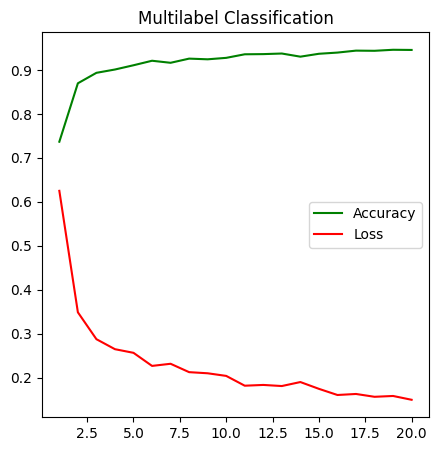

In [26]:
plt.figure(figsize=(5,5))
plt.plot(np.arange(1,21),training_acc,color='g',label='Accuracy')
plt.plot(np.arange(1,21),training_loss,color='r',label ='Loss')
plt.title('Multilabel Classification')
plt.legend(loc=0)
plt.show()

In [27]:
def prediction(path):
  img=plt.imread(path)
  print(img.shape)

  #resizing the image
  img = cv2.resize(img,(256,256))
  print(img.shape)

  #rescaling
  img = np.array(img)/255.0

  #expaning dimension
  img = np.expand_dims(img,axis = 0)
  print(img.shape)

  # Now give the data to trained model
  result = model.predict(img)
  print(result)

  sol=np.argmax(result,axis = 1)
  print(sol[0])
  print(labels[sol[0]])


  image = plt.imread(path)
  plt.imshow(image)

(1066, 1374, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 385ms/step
[[3.0721794e-06 9.6656603e-01 3.3430841e-02]]
1
NORMAL


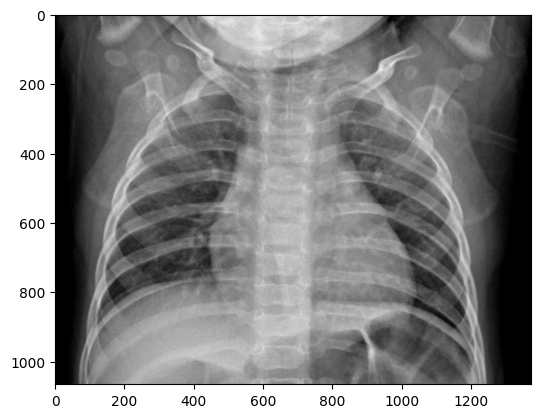

In [28]:
prediction('/content/drive/MyDrive/top mentor deep learning/01.10.2023/test/NORMAL/NORMAL(1280).jpg')

(648, 1080, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 68ms/step
[[2.3305968e-04 1.7522663e-04 9.9959177e-01]]
2
PNEUMONIA


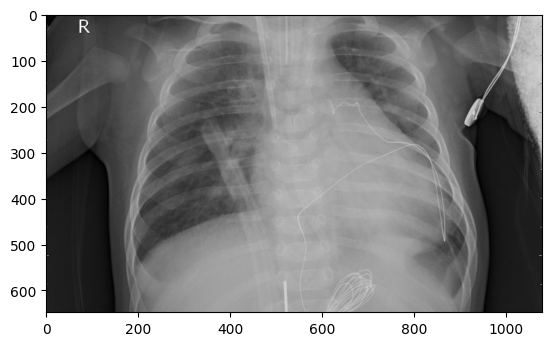

In [29]:
prediction('/content/drive/MyDrive/top mentor deep learning/01.10.2023/test/PNEUMONIA/PNEUMONIA(3463).jpg')

(2067, 2078, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 19ms/step
[[3.2108356e-04 9.3579233e-01 6.3886642e-02]]
1
NORMAL


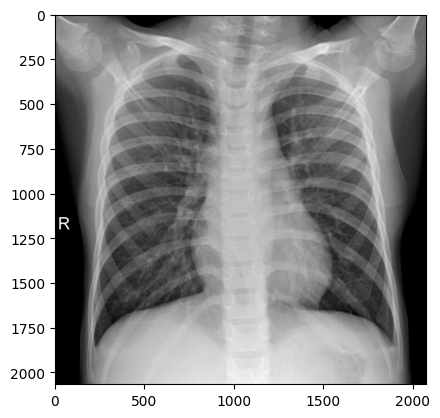

In [30]:
prediction('/content/drive/MyDrive/top mentor deep learning/01.10.2023/test/NORMAL/NORMAL(1422).jpg')

(1330, 1187, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 25ms/step
[[9.9900973e-01 9.6876337e-04 2.1414651e-05]]
0
COVID19


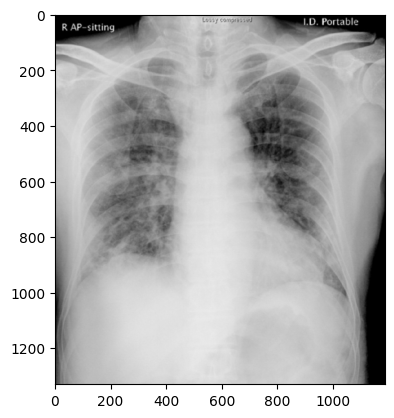

In [31]:
prediction('/content/drive/MyDrive/top mentor deep learning/01.10.2023/test/COVID19/COVID19(568).jpg')

(736, 992, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 17ms/step
[[2.511211e-04 9.603641e-03 9.901452e-01]]
2
PNEUMONIA


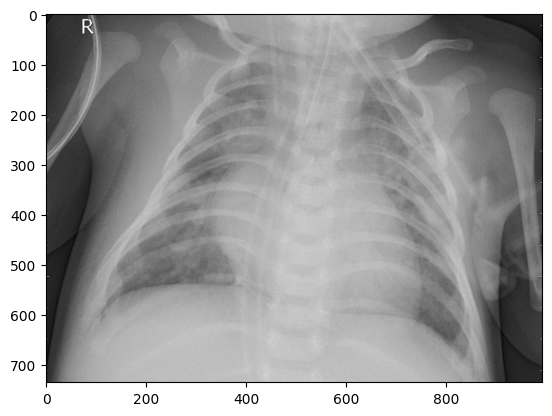

In [32]:
prediction('/content/drive/MyDrive/top mentor deep learning/01.10.2023/test/PNEUMONIA/PNEUMONIA(3611).jpg')

(833, 938, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 25ms/step
[[9.8404551e-01 1.6703359e-04 1.5787428e-02]]
0
COVID19


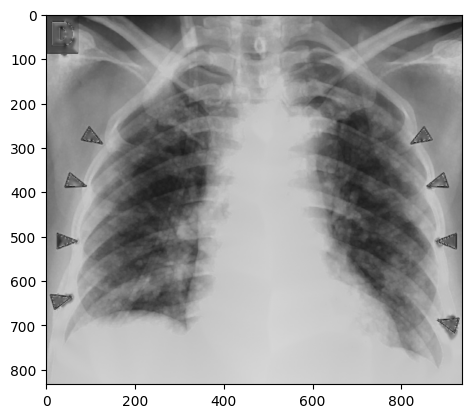

In [33]:
prediction('/content/drive/MyDrive/top mentor deep learning/01.10.2023/test/COVID19/COVID19(561).jpg')